# Quantization of signals

[Quantization](https://en.wikipedia.org/wiki/Quantization_(signal_processing)) of a signal is a process in which a signal that can assume values from some "richer" set (typically the continuum of real numbers or its floating-point subset) is approximated by values from a "less rich" (countable, perhaps even finite) set.   

One simple yet useful variant uses a uniform (or equidistant) grid, which separates the orignal space into intervals of equal lengths. All the values in in a given interval are then mapped to a single quantized value (also called level). 

If zero is in the interval of the values to be quantized, there are two major configurations depending on how this mapping works around zero:

- mid-riser quantization,
- mid-tread quantization.

The terminology is derived from the English terms used to describe a staircase and as such is almost self-explaining, but below we give some more technical description.

## Mid-riser quantization

For a length $\Delta x$ of the quantization interval, the transfer function between the original signal value $x$ and its quantized value $Q(x)$ is visualized below.

![Mid-riser quantization](figures/midriser.png)

One observation is that zero is not among the possible quantized values. This may be inappropriate in some applications, in particular, if regulation (control towards zero) is required.

The algoritm is composed of two stages: 

- *Classification stage*: the real (or floating-point) number is converted to an *integer index* $k$.
- *Reconstruction stage*: the integer is used to parameterize the approximation $Q(x)$ of the original data $x$.

Note that while doing the quantization, both the input and output signals share the same physical units. It is only the possibly subsequent step of *binary encoding* that turns the quantized signal into a binary code (typically derived from the *integer index* $k$ introduced above). 

An algorithm now follows

In [1]:
function Q_midriser(x,Δx)
    k = floor(x/Δx)              
    return k*Δx+1/2
end

Q_midriser (generic function with 1 method)

Comment: 1/2 is now safely a float type in Julia, the slash implements a floating point division.

### Example

First, the interval must be chosen and fixed

In [2]:
Δx = 1.0

1.0

Now, let's choose the value that we are going to quantize

In [3]:
x = 1.3

1.3

and do the actual quantization 

In [4]:
Q_midriser(x,Δx)

1.5

Let's try some more

In [5]:
Q_midriser(0.0,Δx)

0.5

In [6]:
Q_midriser(0.1,Δx)

0.5

In [7]:
Q_midriser(-0.1,Δx)

-0.5

### Binary encoding (into an integer)

Typically the set of values to be quantized is bounded, say 

In [8]:
xmin = -4.0
xmax = 4.0

4.0

and the set of quantized values is finite. In order to encode the quantized value using a binary code (a string of 1s and 0s), the size of the set of quantized values is preferrably set to a power of two 

In [9]:
n = 3
N = 2^n

8

The length of the quantization interval (the *range*) is then

In [10]:
Δx = (xmax-xmin)/N

1.0

When it comes to encoding those 8 levels in a binary code, there are several options. First, we must decide if the resulting (binary-encoded) integer is to be signed or unsigned. Let's start with the signed version.

#### Signed integer

In [11]:
function ftoi_midriser(x,xmin,xmax,n)
    N = 2^n
    Δx = (xmax-xmin)/N
    k = floor(x/Δx)      # integer index
    return Int64(k)
end

ftoi_midriser (generic function with 1 method)

In [12]:
ftoi_midriser(-0.1,xmin,xmax,n)

-1

In [13]:
ftoi_midriser(0.1,xmin,xmax,n)

0

In [14]:
ftoi_midriser(3.9,xmin,xmax,n)       # And how about x=xmax? Obviosly some special rule must be set.

3

In [15]:
x = xmin:0.05:(xmax-Δx/100)

-4.0:0.05:3.95

In [16]:
using Plots

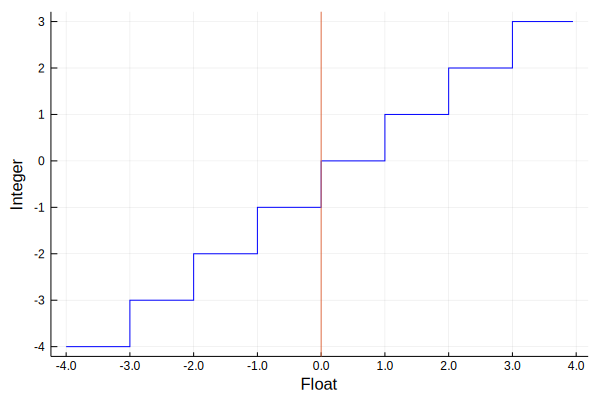

In [17]:
plot(x,ftoi_midriser.(x,xmin,xmax,n),color=:blue,label="",linetype=:steppost,xlabel="Float",ylabel="Integer")
plot!([0], seriestype="vline", xticks = (xmin:xmax, string.(xmin:xmax)), yticks = (-4:3,string.(-4:3)), label="")

#### Unsigned integer

In [18]:
function ftoui_midriser(x,xmin,xmax,n)
    N = 2^n
    Δx = (xmax-xmin)/N
    k = floor(x/Δx)      # integer index
    k0 = N/2             # offset in the integer index, set to zero if signed int required
    return Int64(k+k0)
end

ftoui_midriser (generic function with 1 method)

In [19]:
ftoui_midriser(-0.1,xmin,xmax,n)

3

In [20]:
ftoui_midriser(3.9,xmin,xmax,n)       # And how about x=xmax? Obviosly some special rule must be set.

7

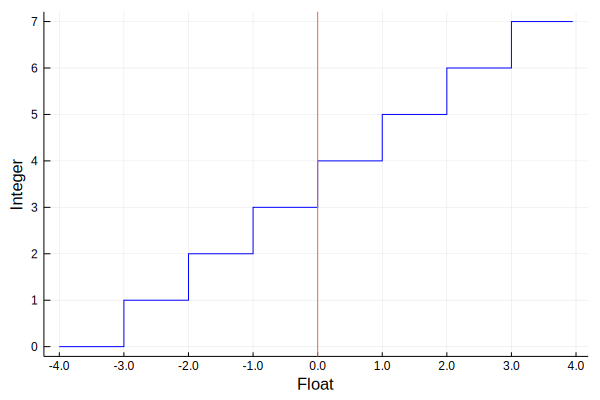

In [21]:
plot(x,ftoui_midriser.(x,xmin,xmax,n),color=:blue,label="",linetype=:steppost,xlabel="Float",ylabel="Integer")
plot!([0], seriestype="vline", xticks = (xmin:xmax, string.(xmin:xmax)), yticks = (0:7,string.(0:7)), label="")

## Mid-tread quantization

Similarly as before, we consider gridding the $x$ axis such that the distance between the grid points is constant and we label it $\Delta x$. These grid points separate the $x$ axis into intervals of equal lengths. This time, however, zero is in the middle of one such interval and not at its boundary as in the mid-riser case. The transfer function between the original signal value $x$ and its quantized value $Q(x)$ is visualized below.

![Mid-tread quantization](figures/midtread.png)

An algorithm now follows

In [22]:
function Q_midtread(x,Δx)
    k = floor(x/Δx+1/2)
    return k*Δx
end

Q_midtread (generic function with 1 method)

### Example

Now, let's choose the value that we are going to quantize

In [23]:
x = 1.3

1.3

In [24]:
Q_midtread(x,Δx)

1.0

And try this for a few more values

In [25]:
Q_midtread(0.0,Δx)

0.0

In [26]:
Q_midtread(0.1,Δx)

0.0

In [27]:
Q_midtread(-0.1,Δx)

0.0

### Binary encoding (into an integer)

In [28]:
xmin = -4.0
xmax = 4.0

4.0

Similarly as before we consider $n$ bits

In [29]:
n = 3

3

But it is obvious from the definition of mid-tread quantization scheme that the number of quantization intervals is even for a symmetric original interval `[xmin,xmax]`.  

In [30]:
N = 2^n-1

7

The length of the quantization interval is then

In [31]:
Δx = (xmax-xmin)/N

1.1428571428571428

#### Signed integer

Similarly as for mid-riser, we consider encoding into an usingned integer here

In [32]:
function ftoi_midtread(x,xmin,xmax,n)
    N = 2^n-1
    Δx = (xmax-xmin)/N
    k = floor(x/Δx+1/2) # integer index
    return Int64(k)
end

ftoi_midtread (generic function with 1 method)

In [33]:
ftoi_midtread(-4.0,xmin,xmax,n)

-3

In [34]:
ftoi_midtread(3.9,xmin,xmax,n)     # And how about x=xmax? Obviosly some special rule must be set.

3

In [35]:
ftoi_midtread(0.0,xmin,xmax,n)      

0

In [36]:
ftoi_midtread(0.1,xmin,xmax,n)

0

In [37]:
ftoi_midtread(-0.1,xmin,xmax,n)

0

In [38]:
x = xmin:0.01:(xmax-Δx/100)

-4.0:0.01:3.98

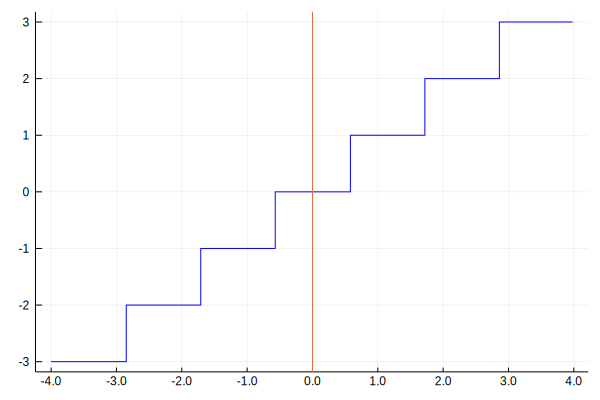

In [39]:
plot(x,ftoi_midtread.(x,xmin,xmax,n),color=:blue,label="",linetype=:steppost)
plot!([0], seriestype="vline", xticks = (xmin:xmax, string.(xmin:xmax)), yticks = (-4:3,string.(-4:3)), label="")

Obviously, at the cost of achieving a quantization scheme symmetric with respec to zero, one bit of resolution had to be sacrifised. There is not much we can do about it as long as we insist on the symmetry.

#### Unsigned integer

In [40]:
function ftoui_midtread(x,xmin,xmax,n)
    N = 2^n-1
    Δx = (xmax-xmin)/N
    k = floor(x/Δx+1/2) # integer index
    k0 = floor(N/2)     # offset in the integer index, set to zero if signed int required
    return Int64(k+k0)
end

ftoui_midtread (generic function with 1 method)

In [41]:
ftoui_midtread(-4.0,xmin,xmax,n)

0

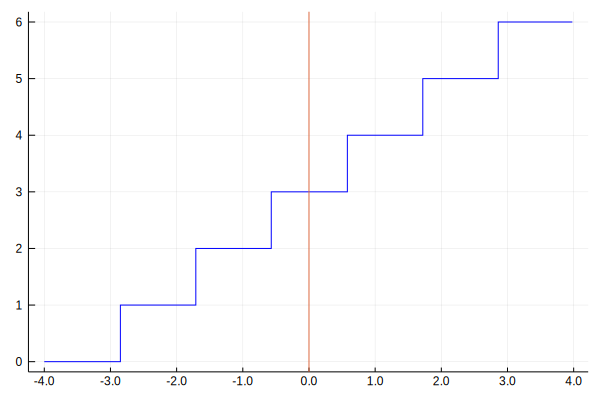

In [42]:
plot(x,ftoui_midtread.(x,xmin,xmax,n),color=:blue,label="",linetype=:steppost)
plot!([0], seriestype="vline", xticks = (xmin:xmax, string.(xmin:xmax)), yticks = (0:7,string.(0:7)), label="")

Here the loss of one bit of resolution is even more pronounced – the eighth bit is not used at all.